In [5]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('data.csv')
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [11]:
# Fill missing conversion data with 0
df['total_conversion'].fillna(0, inplace=True)
df['approved_conversion'].fillna(0, inplace=True)

# Convert date columns from text to a proper datetime format
df['reporting_start'] = pd.to_datetime(df['reporting_start'], dayfirst=True)
df['reporting_end'] = pd.to_datetime(df['reporting_end'], dayfirst=True)

/var/folders/jk/f_ysh6wj59v_wxwrqllkhj7m0000gn/T/ipykernel_4787/2578420703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_conversion'].fillna(0, inplace=True)
/var/folders/jk/f_ysh6wj59v_wxwrqllkhj7m0000gn/T/ipykernel_4787/2578420703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [13]:
# Calculate Click-Through Rate (CTR)
df['CTR'] = df['clicks'] / df['impressions']

# Calculate Return on Investment (ROI) and clean up any resulting errors
df['ROI'] = (df['total_conversion'] - df['spent']) / df['spent']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['ROI'].fillna(0, inplace=True)

/var/folders/jk/f_ysh6wj59v_wxwrqllkhj7m0000gn/T/ipykernel_4787/3503577929.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ROI'].fillna(0, inplace=True)


In [24]:
# Find rows where 'fb_campaign_id' is not a number
# The 'coerce' part will turn any text into NaN (Not a Number)
# .isna() will then find those rows for us.
problem_rows = df[pd.to_numeric(df['fb_campaign_id'], errors='coerce').isna()]

# Display the problem rows
print(problem_rows)

        ad_id reporting_start reporting_end campaign_id fb_campaign_id  age  \
761   1121594      2017-08-26    2017-08-26       45-49              M   10   
762   1121597      2017-08-30    2017-08-30       45-49              M   15   
763   1121598      2017-08-30    2017-08-30       45-49              M   15   
764   1121599      2017-08-30    2017-08-30       45-49              M   15   
765   1121601      2017-08-30    2017-08-30       45-49              M   16   
...       ...             ...           ...         ...            ...  ...   
1138  1314410      2017-08-19    2017-08-19       45-49              F  109   
1139  1314411      2017-08-19    2017-08-19       45-49              F  110   
1140  1314412      2017-08-19    2017-08-19       45-49              F  111   
1141  1314414      2017-08-17    2017-08-17       45-49              F  113   
1142  1314415      2017-08-17    2017-08-17       45-49              F  114   

     gender  interest1  interest2  interest3  impre

In [26]:
# Get the index numbers of the problem rows you just found
indices_to_drop = problem_rows.index

# Drop these rows from your DataFrame
df.drop(indices_to_drop, inplace=True)

In [32]:
# This will now work correctly
df['ad_id'] = df['ad_id'].astype(int)
df['campaign_id'] = df['campaign_id'].astype(int)
df['fb_campaign_id'] = df['fb_campaign_id'].astype(int)

# Verify the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ad_id                761 non-null    int64         
 1   reporting_start      761 non-null    datetime64[ns]
 2   reporting_end        761 non-null    datetime64[ns]
 3   campaign_id          761 non-null    int64         
 4   fb_campaign_id       761 non-null    int64         
 5   age                  761 non-null    object        
 6   gender               761 non-null    object        
 7   interest1            761 non-null    int64         
 8   interest2            761 non-null    int64         
 9   interest3            761 non-null    int64         
 10  impressions          761 non-null    float64       
 11  clicks               761 non-null    int64         
 12  spent                761 non-null    float64       
 13  total_conversion     761 non-null  

In [38]:
# Display the data types and first few rows to confirm changes
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,ROI
0,708746,2017-08-17,2017-08-17,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.000136,0.398601
1,708749,2017-08-17,2017-08-17,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.000112,0.098901
2,708771,2017-08-17,2017-08-17,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.000000,0.000000
3,708815,2017-08-30,2017-08-30,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.000235,-0.200000
4,708818,2017-08-17,2017-08-17,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.000242,-0.224806


In [43]:
# Save the final, clean DataFrame to a new CSV file
df.to_csv('cleaned_campaign_data.csv', index=False)

print("\n\nSuccessfully created 'cleaned_campaign_data.csv'!")



Successfully created 'cleaned_campaign_data.csv'!


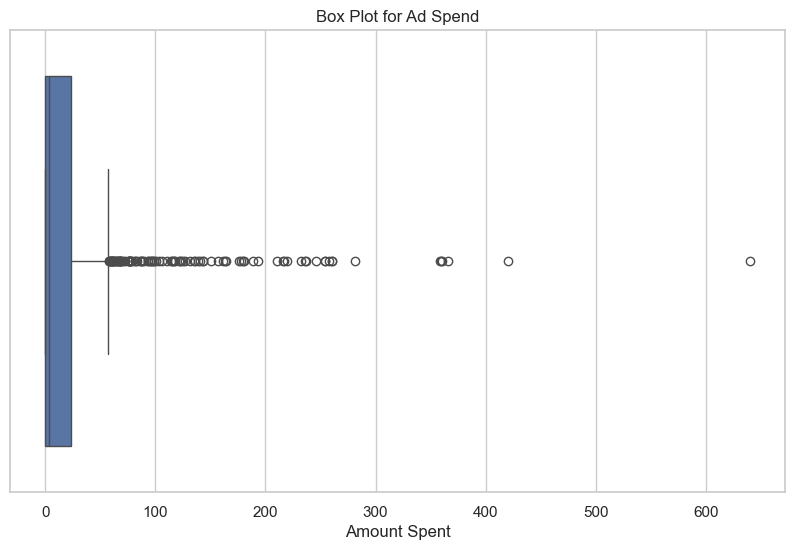

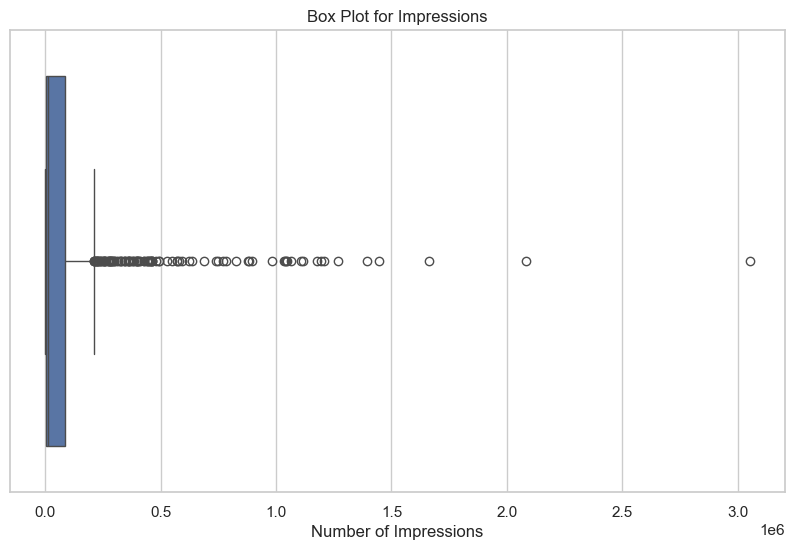

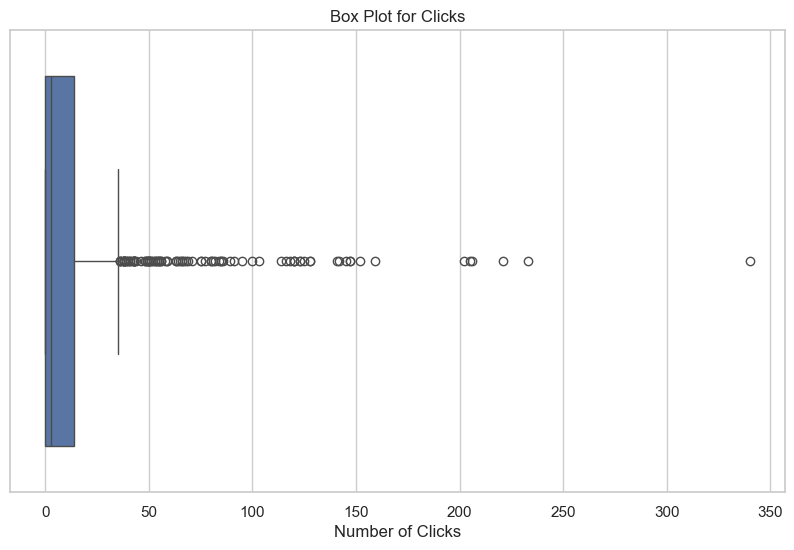

In [58]:
# We need these libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# --- Box Plot for Ad Spend ---
# A box plot is excellent for showing the distribution and identifying outliers in a single variable.
# The dots to the right of the main box are the outliers.
plt.figure(figsize=(10, 6)) # Adjust figure size
sns.boxplot(x=df['spent'])
plt.title('Box Plot for Ad Spend')
plt.xlabel('Amount Spent')
plt.show()

# --- Box Plot for Impressions ---
plt.figure(figsize=(10, 6)) # Adjust figure size
sns.boxplot(x=df['impressions'])
plt.title('Box Plot for Impressions')
plt.xlabel('Number of Impressions')
plt.show()

# --- Box Plot for Clicks ---
plt.figure(figsize=(10, 6)) # Adjust figure size
sns.boxplot(x=df['clicks'])
plt.title('Box Plot for Clicks')
plt.xlabel('Number of Clicks')
plt.show()
